# Predicting Heart Disease

**The following project aims to predict whether a person has heart disease based on various medical attributes provided by medical facilities.**

Our approach to build the solution:

1. Problem Defination
2. Getting the Data ML ready
3. Evaluation of our model
4. Features which are contributing and other which are not 
5. Modelling 
6. Experimentation
7. Putting it together


### 1. Problem Defination

Given clinical parameters of a patient, the goal is to build a model that can accurately predict whether the patient has heart disease or not. This can be valuable in assisting healthcare professionals in making early diagnoses and providing appropriate treatments.

### 2. Dataset

The dataset used for this project is sourced from the UCI Machine Learning Repository. It contains 76 attributes, but most experiments with this dataset focus on a subset of 14 attributes. The data was collected by multiple institutions, including -:

>Creators:
<br></br>
<br>Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.</br>
<br>University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.</br>
<br>University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.</br>
<br>V.A. Medical Center, Long Beach </br>
<br>Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.</br>

The selected attributes for analysis are as follows:

1. age (In years)
2. sex: 1 = Male; 0 = Female
3. chest pain type:
    0: Typical angina chest pain related decrease blood supply to the heart.
    1: Atypical angina chest pain not related to heart.
    2: Non-anginal pain typically esophageal spasms (non heart related).
    3: Asymptomatic chest pain not showing signs of disease.
4. trestbps: Resting Blood Pressure (in mmHg on admission to the hospital) anything above 130-140 is typically cause for concern.
5. chol: Serum Cholesterol in mg/dl. Serum = LDL + HDL + 0.2 x triglycerides. Above 200 is cause for concern.
6. fbs: Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false). FBS>126 mg/dL signals diabetes.
7. restecg: Resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality can range from mild symptoms to severe problems signals                 
non-normal heart beat
2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping 
chamber
8. thalach: Maximum heart rate achieved
9. exang: Exercise Induced Angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. slope: The slope of the peak exercise ST segment
0: Upsloping: better heart rate with exercise (uncommon)
1: Flat Sloping: minimal change (typical healthy heart)
2: Downsloping: signs of unhealthy heart
12. ca: Number of major vessels (0-3) colored by fluoroscopy. Colored vessel means the doctor can see the blood passing through the more blood movement the better(no clots).
13. thal: Thallium Stress Result
1-3: Normal
6: Fixed Defect: Used to be defect but ok now
7: Reversible Defect: No proper blood movement when exercising
14. target: Have disease or not (1=yes, 0=no) (= the predicted attribute)

>The data is available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci


### 3. Evaluation

The model's performance will be evaluated based on its accuracy in predicting whether or not a patient has heart disease. The evaluation metric used will be accuracy, which measures the proportion of correct predictions.

The goal for this project is to achieve an accuracy of at least 85% in the proof of concept phase. If the model can consistently achieve this level of accuracy, further steps will be taken to deploy and utilize the model in real-world scenarios.

### 4. Features Analysis

During the project, an analysis will be conducted to determine the contribution of each feature towards predicting heart disease. This analysis will help identify the most influential features and provide insights into the relationship between the selected attributes and the presence of heart disease.

### 5. Modeling

Various machine learning algorithms will be implemented to build predictive models for heart disease detection. One approach is to use the Random Forest classifier, which is known for its ability to handle complex relationships between features and target variables. The classifier will be trained on the labeled data, allowing it to learn patterns and make predictions on unseen instances.

### 6. Experimentation

The project will involve experimentation with different models, hyperparameter tuning, and feature selection techniques to improve the accuracy and robustness of the predictions. Cross-validation and performance evaluation on test data will be carried out to ensure the model's reliability and generalizability.

### 7.  Putting it Together

The final phase of the project will involve consolidating the best-performing model, documenting the methodology, and creating a user-friendly interface for utilizing the trained model in practical settings. The project's findings, including insights from feature analysis, model performance, and potential applications, will be summarized to provide a comprehensive solution for heart disease prediction.

By following this structured approach, the project aims to develop a reliable and accurate model for predicting heart disease based on clinical parameters.


### Preparing all the tools Required for the solution
* Libraries used are PySpark, Seaborn, Numpy , Matplotlib and Pandas for Data analysis, manipulation and visualisation
* CrossValidator and MulticlassClassificationEvaluator is used for modeling our estimator and making prediction based on parameters

In [1]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F
from pyspark.ml.stat import Correlation
import seaborn as sns
from pyspark.sql.types import IntegerType
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [2]:
spark = SparkSession.builder.appName('heart-disease').getOrCreate()
df = spark.read.csv('Data/heart-disease.csv', header=True, inferSchema=True)

# Showing the first 5 rows of the dataset
df.show(5)


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
| 63|  1|  3|     145| 233|  1|      0|    150|    0|    2.3|    0|  0|   1|     1|
| 37|  1|  2|     130| 250|  0|      1|    187|    0|    3.5|    0|  0|   2|     1|
| 41|  0|  1|     130| 204|  0|      0|    172|    0|    1.4|    2|  0|   2|     1|
| 56|  1|  1|     120| 236|  0|      1|    178|    0|    0.8|    2|  0|   2|     1|
| 57|  0|  0|     120| 354|  0|      1|    163|    1|    0.6|    2|  0|   2|     1|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
only showing top 5 rows



In [3]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [4]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

# Size and Shape of the data

In [5]:
# Computing the number of rows in the dataframe
num_rows = df.count()

# Computing the number of columns in the dataframe
num_cols = len(df.columns)

# Printing the results
print('Number of rows:', num_rows)
print('Number of columns:', num_cols)


Number of rows: 303
Number of columns: 14


# Finding the count of target column

In [6]:
# Grouping the dataframe by the 'target' column and counting the number of occurrences
df.groupBy('target').count().show()


+------+-----+
|target|count|
+------+-----+
|     1|  165|
|     0|  138|
+------+-----+



# Visualising the count of each class

<Axes: xlabel='target'>

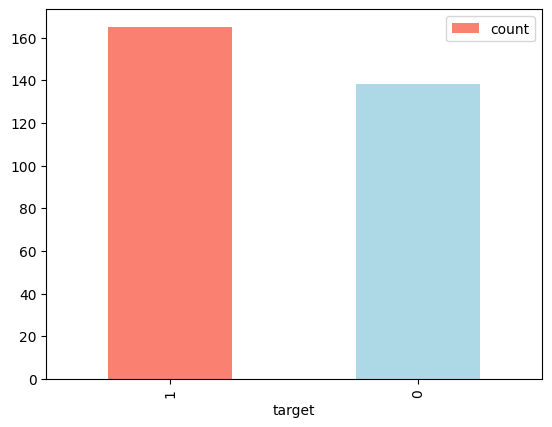

In [7]:
# Computing the value counts for the 'target' column
value_counts = df.groupBy('target').count().toPandas()

# Plotting the value counts as a bar plot
value_counts.plot(kind='bar', x='target', y='count',
                  color=["salmon", "lightblue"])


In [8]:
# Computing the number of null values for each column
df.agg(*[sum(df[col].isNull().cast('int')).alias(col) for col in df.columns]).show()


+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|target|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+
|  0|  0|  0|       0|   0|  0|      0|      0|    0|      0|    0|  0|   0|     0|
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+------+



## Drawing Insights from the data

In [9]:
# Creating the cross-tabulation table
df.crosstab('sex', 'target').show()

+----------+---+---+
|sex_target|  0|  1|
+----------+---+---+
|         0| 24| 72|
|         1|114| 93|
+----------+---+---+



(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

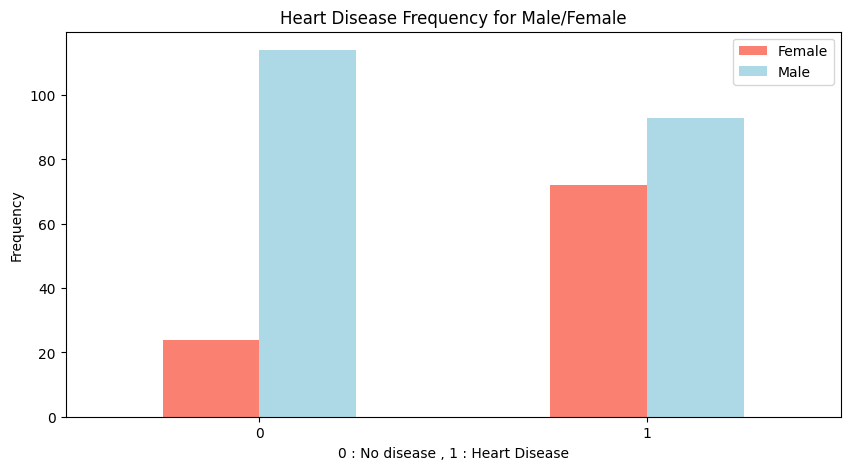

In [10]:
ct = df.crosstab('target', 'sex').toPandas()

# Plotting the cross-tabulation table as a bar plot
ct.plot(kind='bar', x='target_sex', y=[1, 2], figsize=(10, 5), color=["salmon", "lightblue"])
plt.title('Heart Disease Frequency for Male/Female')
plt.xlabel('0 : No disease , 1 : Heart Disease')
plt.ylabel('Frequency')
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

# Creating the scatter plot for Age vs Max Heart Rate

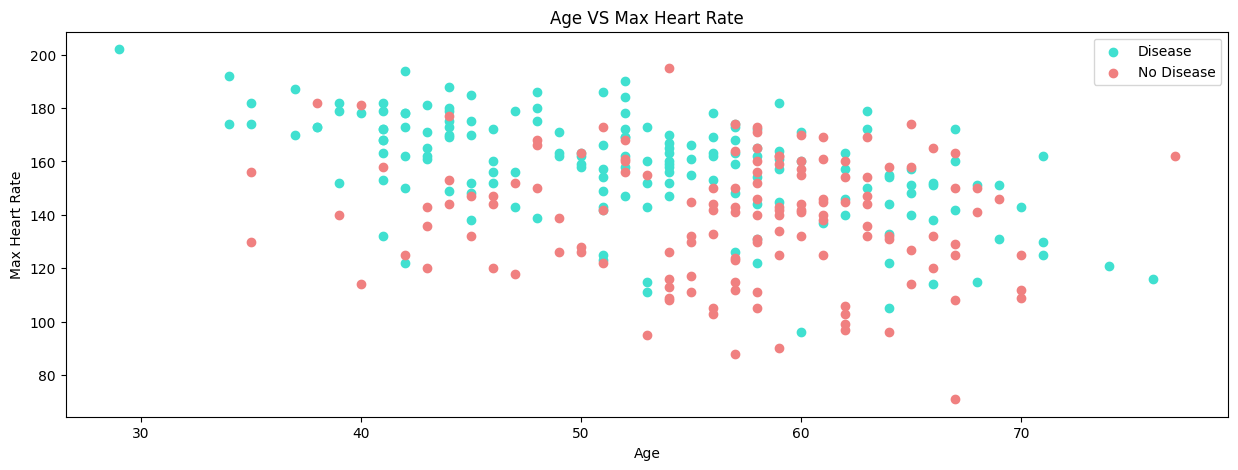

In [11]:
# Converting the Spark dataframe to a pandas dataframe
pdf = df.select(['age', 'thalach', 'target']).toPandas()

# Creating the scatter plot
plt.figure(figsize=(15, 5))

plt.scatter(pdf['age'][pdf['target'] == 1], pdf['thalach'][pdf['target'] == 1], color='turquoise')
plt.scatter(pdf['age'][pdf['target'] == 0], pdf['thalach'][pdf['target'] == 0], color='lightcoral')

plt.title('Age VS Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

# Checking the distribution of age

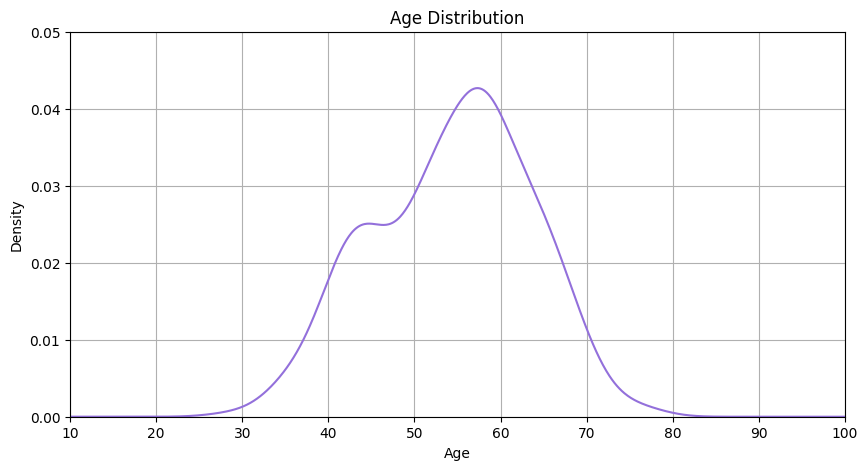

In [12]:
# Converting the Spark dataframe to a pandas dataframe
pdf = df.select('age').toPandas()

# Creating the density plot
plt.figure(figsize=(10, 5))
pdf['age'].plot(kind='density', color='mediumpurple', xlim=[10, 100], ylim=[0.00, 0.05])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(visible=True)

## Heart Disease Frequency per Chest Pain Type
**cp - chest pain type**

* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [13]:


# Creating the cross-tabulation table
ct = df.groupBy('target').pivot('cp').agg(F.count('cp')).na.fill(0)

# Displaying the cross-tabulation table
ct.show()

+------+---+---+---+---+
|target|  0|  1|  2|  3|
+------+---+---+---+---+
|     1| 39| 41| 69| 16|
|     0|104|  9| 18|  7|
+------+---+---+---+---+



(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

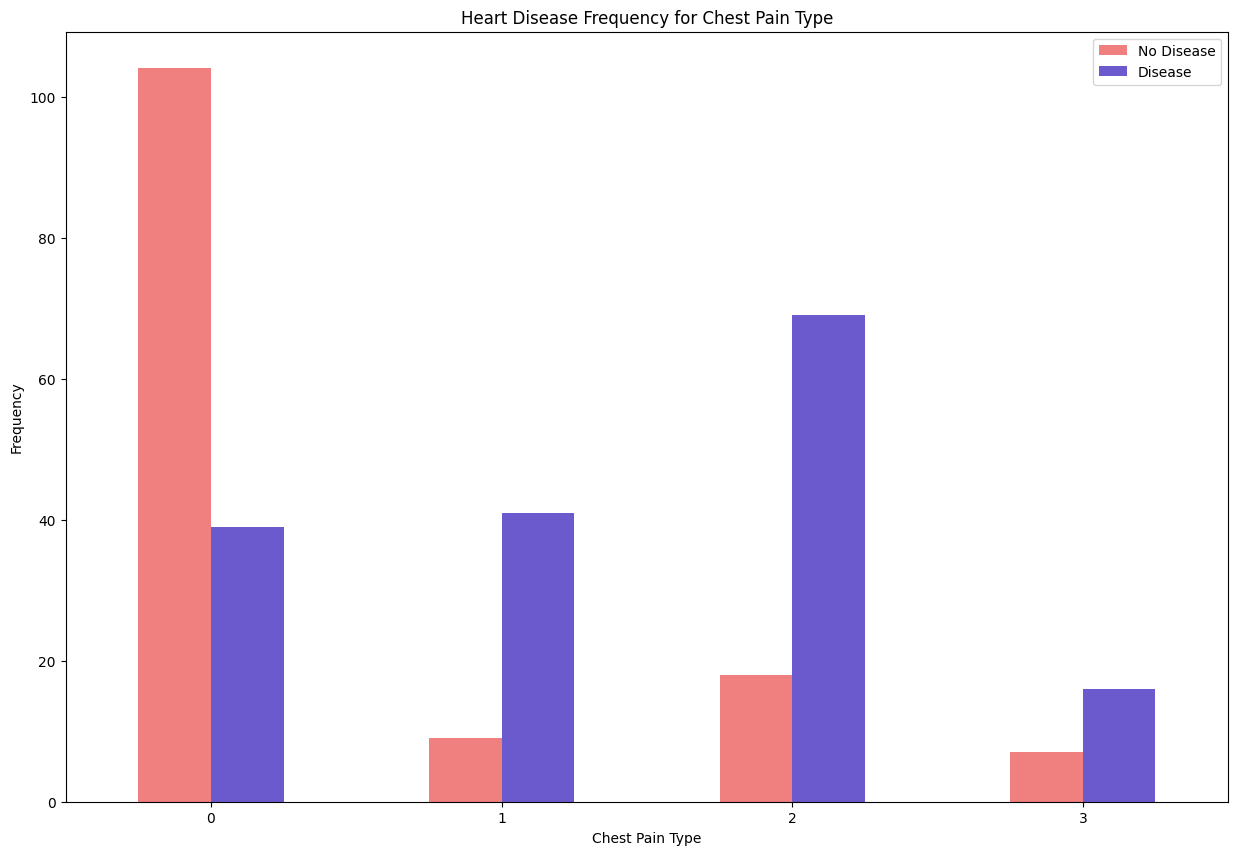

In [14]:
ct = df.groupBy('cp').pivot('target').agg(F.count('target')).na.fill(0)
pdf = ct.toPandas()

# Sorting the dataframe by the 'cp' column
pdf = pdf.sort_values(by='cp')

# Creating the bar plot
pdf.plot(kind='bar', x='cp', color=["lightcoral", "slateblue"],figsize=(15, 10))
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Heart Disease Frequency for Chest Pain Type')
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

## Correlation Matrix

In [15]:
# Dropping non-numeric columns from the Spark DataFrame
numeric_cols = [col for col in df.columns ]
numeric_df = df.select(numeric_cols)

# Converting the columns to IntegerType
for col_name in numeric_df.columns:
    numeric_df = numeric_df.withColumn(col_name, numeric_df[col_name].cast(IntegerType()))

# Creating a VectorAssembler to assemble all features into a single column
assembler = VectorAssembler(inputCols=numeric_df.columns, outputCol='features')
assembled_df = assembler.transform(numeric_df).select('features')

# Computing the correlation matrix using the Spark ML Correlation function
corr_matrix = Correlation.corr(assembled_df, 'features').head()[0]

# Converting the correlation matrix to a pandas DataFrame
corr_df = pd.DataFrame(corr_matrix.toArray(), columns=numeric_cols, index=numeric_cols)

# Displaying the correlation matrix
corr_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.178396,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.089604,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.180783,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.190276,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.035479,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.022088,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.055906,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.327627,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.271144,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.178396,0.089604,-0.180783,0.190276,0.035479,0.022088,-0.055906,-0.327627,0.271144,1.000000,-0.555175,0.232167,0.198263,-0.423572


## Generating Heatmap

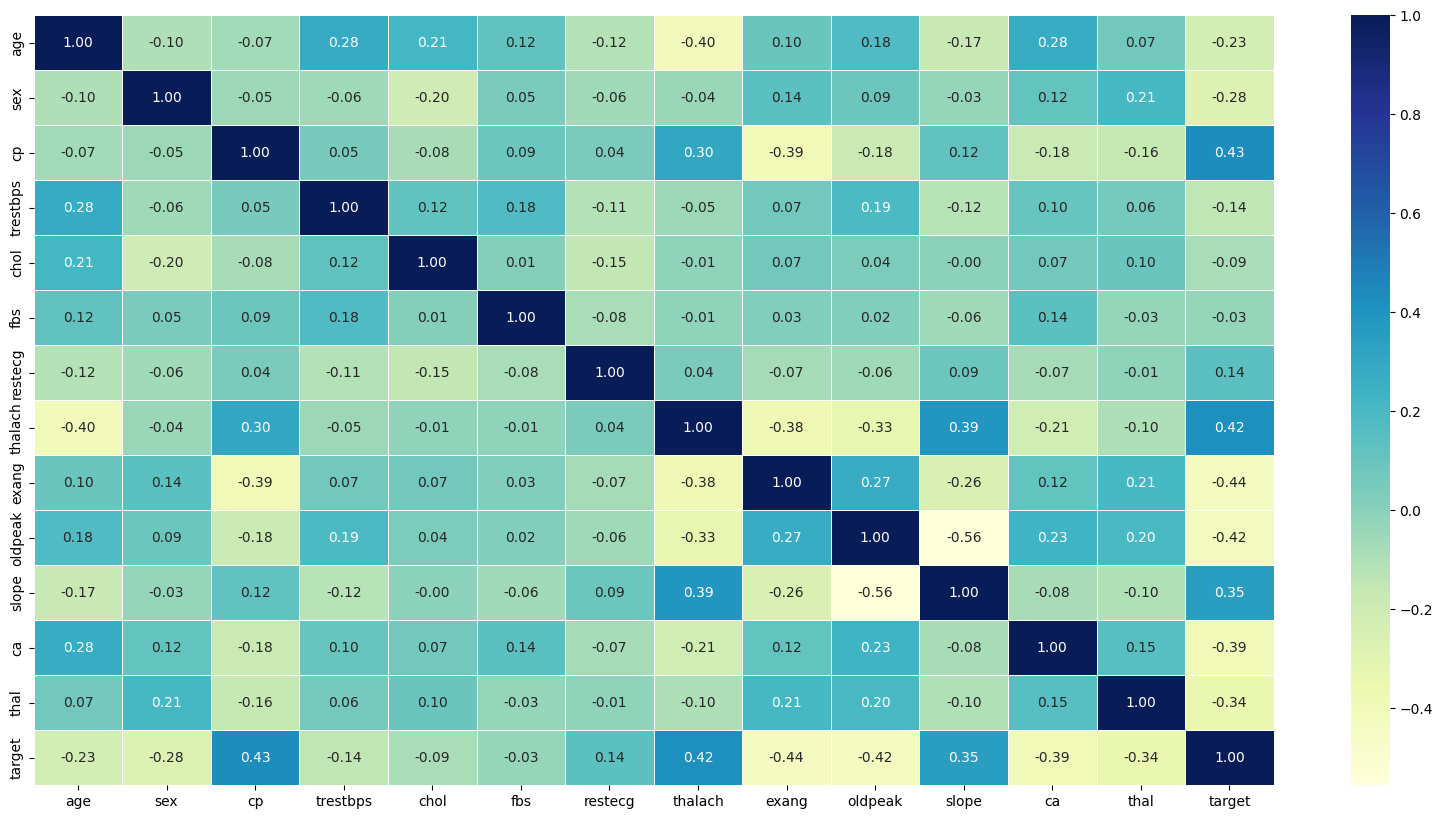

In [16]:
corr_matrix = corr_df
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu",
                 linewidths=0.5, fmt=".2f")
ax.tick_params(axis='x', labelrotation=0)

## Making a single communication visualisation

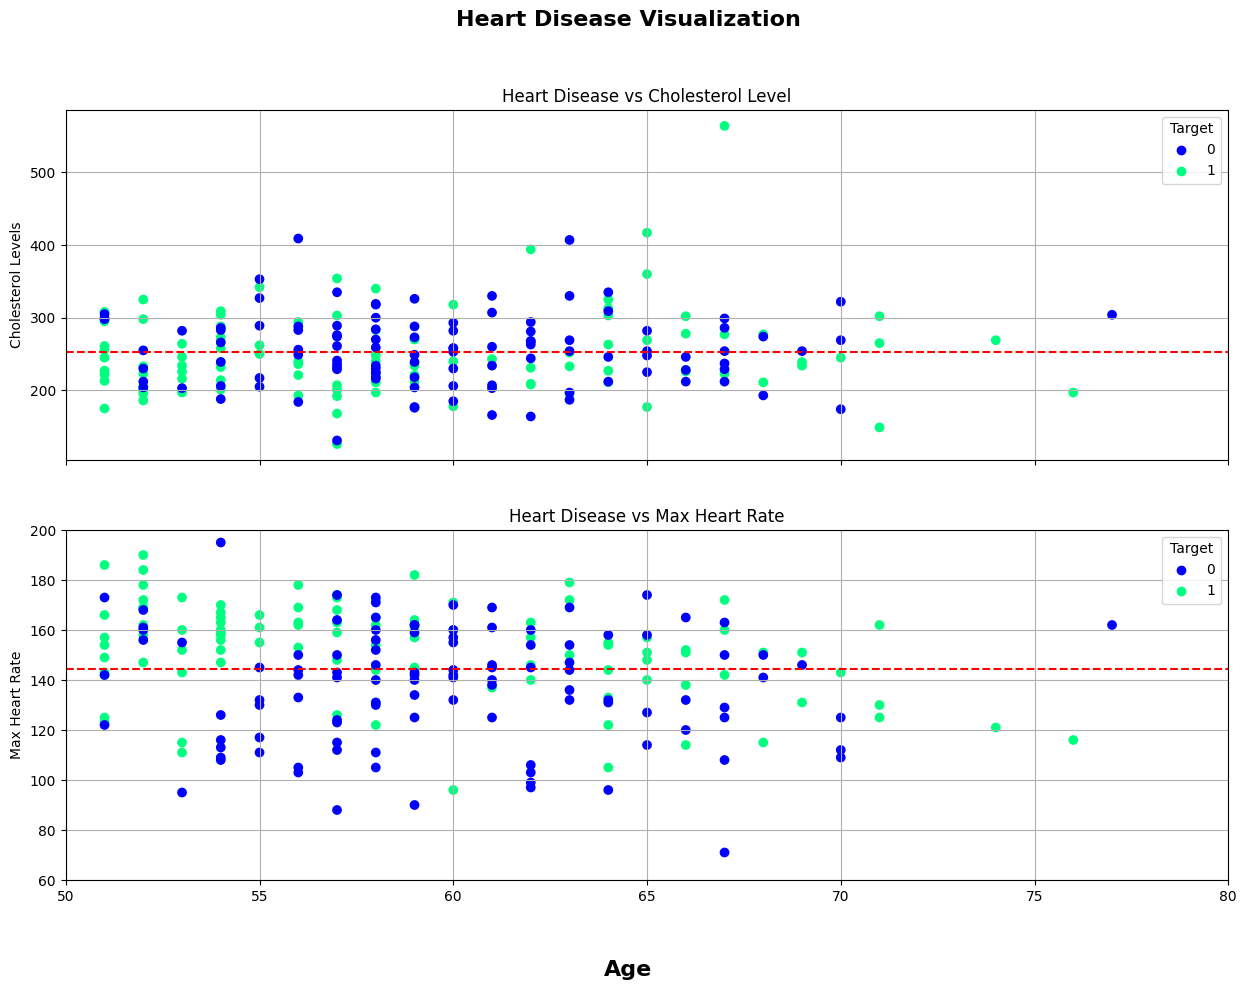

In [17]:
%matplotlib inline


# Reading the data of patients over 50
over_50 = df.filter(df.age > 50).toPandas()

# Creating a figure with 2 axes
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15, 10))


# Plotting in ax0 Heart Disease vs Cholestrol level
scatter = ax0.scatter(over_50["age"], over_50["chol"],
                      c=over_50["target"], cmap="winter")

ax0.set(title="Heart Disease vs Cholesterol Level",
        ylabel="Cholesterol Levels", xlim=[50, 80])
ax0.axhline(y=over_50["chol"].mean(),color='r',
            linestyle="--", label="Average")
ax0.grid()
ax0.legend(*scatter.legend_elements(), title="Target")

# Plotting in ax1 Heart Disease vs Max Heart Rate
scatter = ax1.scatter(over_50["age"], over_50["thalach"],
                      c=over_50["target"], cmap="winter")
ax1.set(title="Heart Disease vs Max Heart Rate",
        ylabel="Max Heart Rate", ylim=[60, 200])
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--", color='r', label="Average")
ax1.legend(*scatter.legend_elements(), title="Target")

# Giving a super title to the plot
fig.suptitle("Heart Disease Visualization", fontsize=16, fontweight="bold")
fig.supxlabel("Age", fontsize=16, fontweight="bold")
plt.grid()
plt.show()

## Modeling and Data Selection

In [18]:


stages = []
#Target column
label_stringIdx = StringIndexer(inputCol = 'target', outputCol = 'label')
stages += [label_stringIdx]
#Numeric Columns
numericCols = ['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'slope',
 'ca',
 'thal',
 ] 
#Create a vector assembler
assemblerInputs = numericCols 
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features").setHandleInvalid('keep')
stages += [assembler]
X = np.array(df.drop("target").rdd.map(lambda x: x[0]).collect())
y = np.array(df.select(F.col("target")).rdd.map(lambda x: x[0]).collect())

## Using MulticlassClassificationEvaluator

In [19]:

pipeline = Pipeline(stages=stages)
pipelineModel = pipeline.fit(df)
df3 = pipelineModel.transform(df)
selectedCols = ['label', 'features'] + ['age',
                                        'sex',
                                        'cp',
                                        'trestbps',
                                        'chol',
                                        'fbs',
                                        'restecg',
                                        'thalach',
                                        'exang',
                                        'slope',
                                        'ca',
                                        'thal',
                                        'target']

df3 = df3.select(selectedCols)
df3.printSchema()


root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- target: integer (nullable = true)



In [20]:
train, test = df3.randomSplit([0.8, 0.2], seed = 42)
train.groupby('target').count().show()
test.groupby('target').count().show()

+------+-----+
|target|count|
+------+-----+
|     1|  138|
|     0|  118|
+------+-----+

+------+-----+
|target|count|
+------+-----+
|     1|   27|
|     0|   20|
+------+-----+



In [21]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', seed=101)
rfModel = rf.fit(train)
predictions_rf=rfModel.transform(test)

In [22]:

evaluator_rf = MulticlassClassificationEvaluator(predictionCol='prediction')
evaluator_rf.evaluate(predictions_rf)

accuracy = evaluator_rf.evaluate(predictions_rf)

print("Accuracy on test data: {:.2f}%".format(accuracy * 100))

Accuracy on test data: 87.13%


In [23]:
predictions_rf.crosstab('label','prediction').show()

+----------------+---+---+
|label_prediction|0.0|1.0|
+----------------+---+---+
|             1.0|  4| 16|
|             0.0| 25|  2|
+----------------+---+---+



In [24]:

evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions_rf)
print("Accuracy: {}".format(accuracy))

evaluator_pre = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_pre.evaluate(predictions_rf)
print("Precision: {}".format(precision))

evaluator_rec = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_rec.evaluate(predictions_rf)
print("Recall: {}".format(recall))

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1 = evaluator_f1.evaluate(predictions_rf)
print("F1 score: {}".format(f1))

Accuracy: 0.8723404255319149
Precision: 0.8734816988668785
Recall: 0.8723404255319149
F1 score: 0.8712605983042714


<Axes: >

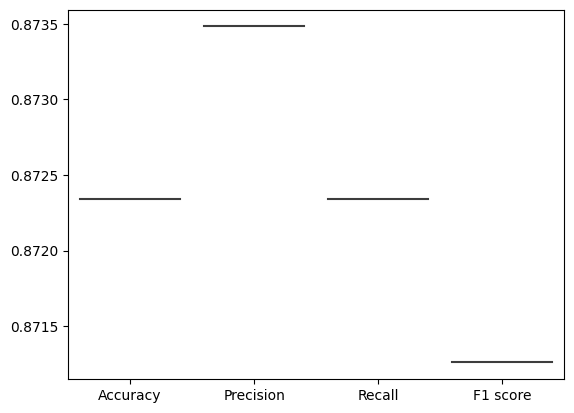

In [25]:
data_dict = {"Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1 score": [f1]}

# Convert the dictionary to a pandas dataframe
df = pd.DataFrame.from_dict(data_dict)

# Generate the violin plot
sns.violinplot(data=df)

## Using CrossValidator

In [26]:
rf_param_grid = (ParamGridBuilder()
                 .addGrid(rf.maxDepth, [5, 10])
                 .addGrid(rf.numTrees, [10, 20])
                 .build())

cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=rf_param_grid,
                    evaluator=evaluator_acc,
                    numFolds=5,
                    seed=42)
cv_model = cv.fit(df3)
mean_acc_plot = cv_model.avgMetrics
mean_accuracy = cv_model.avgMetrics[0]

print("Mean accuracy: {:.4f}".format(mean_accuracy))

Mean accuracy: 0.8258


In [27]:
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=rf_param_grid,
                    evaluator=evaluator_pre,
                    numFolds=5,
                    seed=42)
cv_model = cv.fit(df3)
mean_pre_plot = cv_model.avgMetrics
mean_accuracy = cv_model.avgMetrics[0]

print("Mean Weighted Precision: {:.4f}".format(mean_accuracy))

Mean Weighted Precision: 0.8341


In [28]:
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=rf_param_grid,
                    evaluator=evaluator_rec,
                    numFolds=5,
                    seed=42)
cv_model = cv.fit(df3)
mean_rec_plot = cv_model.avgMetrics
mean_accuracy = cv_model.avgMetrics[0]

print("Mean Weighted Recall: {:.4f}".format(mean_accuracy))

Mean Weighted Recall: 0.8258


In [29]:
cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=rf_param_grid,
                    evaluator=evaluator_f1,
                    numFolds=5,
                    seed=42)
cv_model = cv.fit(df3)
mean_f1_plot = cv_model.avgMetrics
mean_accuracy = cv_model.avgMetrics[0]

print("Mean F1: {:.4f}".format(mean_accuracy))

Mean F1: 0.8236


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1')])

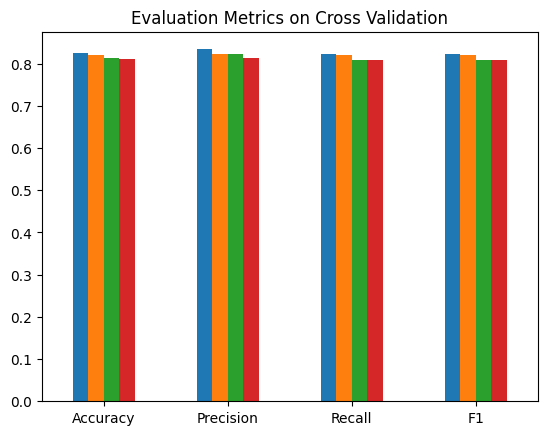

In [30]:
cv_metrics = pd.DataFrame({"Accuracy": mean_acc_plot,
                           "Precision": mean_pre_plot,
                           "Recall": mean_f1_plot,
                           "F1": mean_f1_plot,})

cv_metrics.T.plot.bar(
    legend=False, title="Evaluation Metrics on Cross Validation")
plt.xticks(rotation=0)


In [31]:
cv_metrics = pd.DataFrame({"Accuracy": mean_acc_plot,
                           "Precision": mean_pre_plot,
                           "Recall": mean_f1_plot,
                           "F1": mean_f1_plot,})

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.825790,0.834127,0.823565,0.823565
1,0.820487,0.822685,0.819548,0.819548
2,0.813048,0.822814,0.809809,0.809809
3,0.809994,0.813877,0.808702,0.808702


## Conculsion

<br>We have achieved nearabout 82% of accuracy, but it is not sufficient to predict something as serious as a heart disease.</br>
Hence we need more data and better hyperparameter tuning to take the accuracy above 90%.

## Thank You